### 二分类信息熵

In [2]:
import numpy as np
import matplotlib.pyplot as plt

##### 定义信息熵函数$H(p) = -[p \log_2 p + (1-p) \log_2 (1-p)] $

In [4]:
def entropy(p):
    return -(p*np.log2(p)+(1-p)*np.log2(1-p))

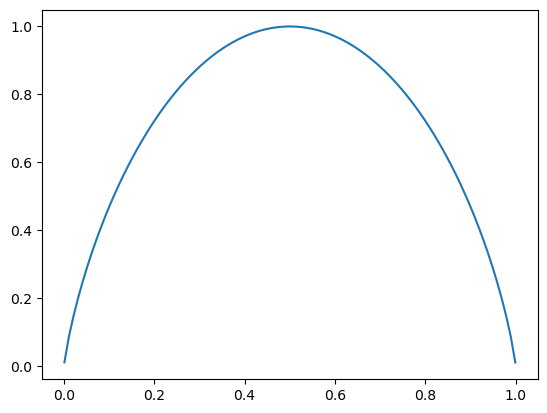

In [5]:
plot_x = np.linspace(0.001,0.999,100)
plt.plot(plot_x,entropy(plot_x))
plt.show()

### 数据集

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:,1:3]
y = iris.target

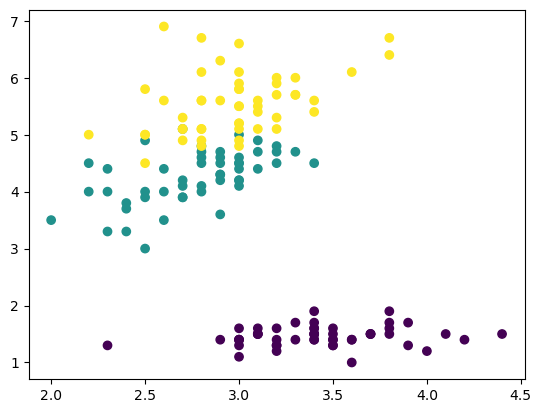

In [8]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### sklearn中的决策树

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier(max_depth =2,criterion = 'entropy')
# max_depth:限制树的最大深度
# criterion='entripy'：使用信息熵作为特征选择准则，基于信息增益
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [12]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max = X[:,0].min()-1,X[:,0].max()+1
    # 计算特征X第一列的最小值和最大值，分别减1和加1，确定绘图时x轴(第一特征)的范围
    axis_x2_min,axis_x2_max = X[:,1].min()-1,X[:,1].max()+1

    x1,x2 = np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    # 使用meshgrid生成网络点，x1和x2是二维数组，形成密集的网络，步长为0.01，用于覆盖整个特征空间
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    # np.ravel():将多维数组展平成一维数组
    # 将x1和x2展平后按列拼接成特征矩阵使用模型clf预测这些网格点的类别，结果存储在z中
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#F5B9EF","#BBFFBB","#F9F9CB"])

    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c = y)
    plt.show()

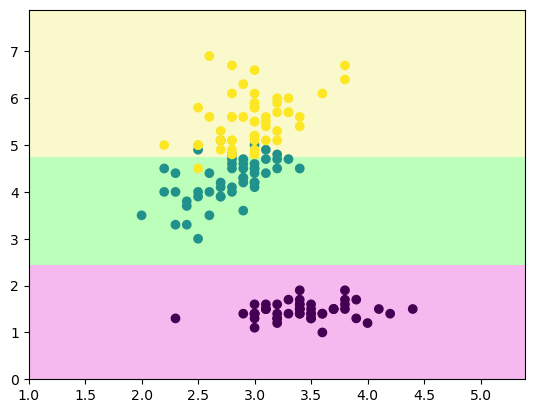

In [13]:
decision_boundary_plot(x,y,clf)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 4.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.154\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.497\nsamples = 55\nvalue = [0, 6, 49]')]

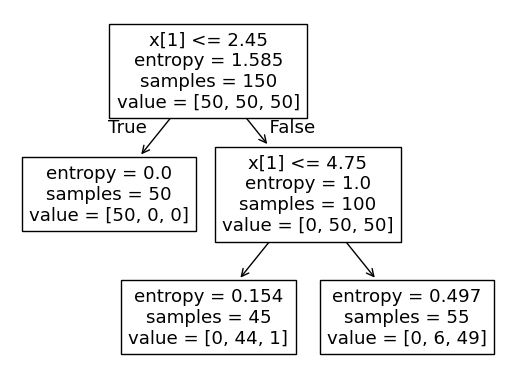

In [14]:
from sklearn.tree import plot_tree
plot_tree(clf)

### 最优划分条件

In [16]:
from collections import Counter
Counter(y)
# Counter:用于统计可迭代对象中元素的出现次数，并对y进行统计

Counter({0: 50, 1: 50, 2: 50})

In [33]:
def calc_entropy(y):
    counter = Counter(y)
    sum_ent = 0
    for i in counter:
        p = counter[i]/len(y)
        sum_ent += (-p*np.log2(p))
    return sum_ent

In [35]:
calc_entropy(y)

1.584962500721156

In [41]:
def split_dataset(x,y,dim,value):
# dim:分割维度
    index_left = (x[:,dim] <= value)
    index_right = (x[:,dim] > value)
    return x[index_left],y[index_left],x[index_right],y[index_right]

In [63]:
def find_best_split(x,y):
    best_dim=-1
    best_value=-1
    best_entropy = np.inf
    # np.inf:正无穷
    best_entropy_left,best_entropy_right = -1,-1
    for dim in range(x.shape[1]):
    # X.shape[1]表示特征的数量，遍历特征矩阵的每一个维度，确保对每个特征都进行分割评估
        sorted_index = np.argsort(x[:,dim])
    # 对当前维度dim的特征值进行排序，返回排序后的索引sorted_index
        for i in range(x.shape[0]-1):
        # x.shape[0]:样本总数
            value_left,value_right = x[sorted_index[i],dim],x[sorted_index[i+1],dim]
            if value_left != value_right:
                value = (value_left+value_right)/2
                # 计算分割值value,将数据集划分为左右两部分
                x_left,y_left,x_right,y_right = split_dataset(x,y,dim,value)
                entropy_left,entropy_right = calc_entropy(y_left),calc_entropy(y_right)
                # 分别计算左子数据集y_left和右子数据集y_right的信息熵
                entropy = (len(x_left)*entropy_left+len(x_right)*entropy_right)/x.shape[0]
                # 计算加权平均信息熵，权重为左右子数据集的样本数占比
                if entropy < best_entropy:
                    best_dim = dim
                    best_value = value
                    best_entropy = entropy
                    best_entropy_left,best_entropy_right = entropy_left,entropy_right
    return best_dim, best_value, best_entropy,best_entropy_left, best_entropy_right                         

In [65]:
find_best_split(x,y)

(1, 2.45, 0.6666666666666666, 0.0, 1.0)

In [67]:
x_left,y_left,x_right,y_right = split_dataset(x,y,1,2.45)

In [73]:
find_best_split(x_right,y_right)

(1, 4.75, 0.34262624992678425, 0.15374218032876188, 0.4971677614160753)